# Analysis
- If you were to ask an average citizen of Toronto if there are a lot of crimes happening, the answer might not be shocking. 
However, to get into the details, such as the types of crimes committed and the time each crime is committed requires a deeper analysis. 
- I have analysed the occurance hour of the top 3 crimes: Assault, Motor Vehicle Theft, and Break & Enter
Firstly, the common actor exisitng in all three crimes, is the fact that the highest number of crimes are happening at 12am. After that, as each hour passes, the number rate of crimes starts to drop.
This could be the reason of lesser people being awake and outdoors as it is nighttime. This provides an avenue for those committing the crime to have a lesser chance of getting noticed and caught.
What's also interesting to see is that at 12pm, we see a peak of the number of crimes committed across all three.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
types = ["Assault","Auto_Theft","Break_and_Enter","Homicide_ASR_RC_TBL_002","Robbery","Theft_Over","Bicycle_Thefts","Shootings_and_Firearm_Discharges"
     ,"Theft_from_Motor_Vehicle"]
count = []
for types_of_crimes in types:
    try:
        url = f"https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/{types_of_crimes}/FeatureServer/0/query?where=1%3D1&outFields=*&returnIdsOnly=true&outSR=4326&f=json"
        response_json = requests.get(url).json()
        count.append(response_json["objectIds"][-1])
    except:
        print("Cant find")
count_df = pd.DataFrame({"Type of Crime":types,"Number of crimes":count}).sort_values("Number of crimes",ascending=False)
count_df

,Type of Crime,Number of crimes
0,Assault,161833
8,Theft_from_Motor_Vehicle,76914
2,Break_and_Enter,56466
1,Auto_Theft,40794
6,Bicycle_Thefts,30154
4,Robbery,29230
5,Theft_Over,9936
7,Shootings_and_Firearm_Discharges,5535
3,Homicide_ASR_RC_TBL_002,1286


In [3]:
# Load csv Files for Assault, Motor Vehicle Theft, and Break & Enter

Assault_Data_to_load = "Resources/Assault.csv"
Motor_Vehicle_Theft_Data_to_load = "Resources/Theft_from_Motor_Vehicle.csv"
Break_and_Enter_Data_to_load = "Resources/Break_and_Enter.csv"


In [4]:
# Read the Top 3 Crimes Data File and store into Pandas DataFrames

Assault_Data = pd.read_csv(Assault_Data_to_load)
Motor_Vehicle_Theft_Data = pd.read_csv(Motor_Vehicle_Theft_Data_to_load)
Break_and_Enter_Data = pd.read_csv(Break_and_Enter_Data_to_load) 


In [5]:
# Merge csv files
merged_crimes_df = pd.concat([Assault_Data,Break_and_Enter_Data,Motor_Vehicle_Theft_Data])

In [6]:
Assault_Crime_by_the_hour = Assault_Data.groupby(["occurrencehour"])["event_unique_id"].count()
Assault_Crime_by_the_hour

occurrencehour
0     10815
1      6658
2      6800
3      4607
4      2959
5      2210
6      2280
7      2979
8      4555
9      5442
10     5921
11     6473
12     9409
13     6969
14     7418
15     8973
16     8200
17     8562
18     8851
19     8537
20     8607
21     8508
22     8084
23     8016
Name: event_unique_id, dtype: int64

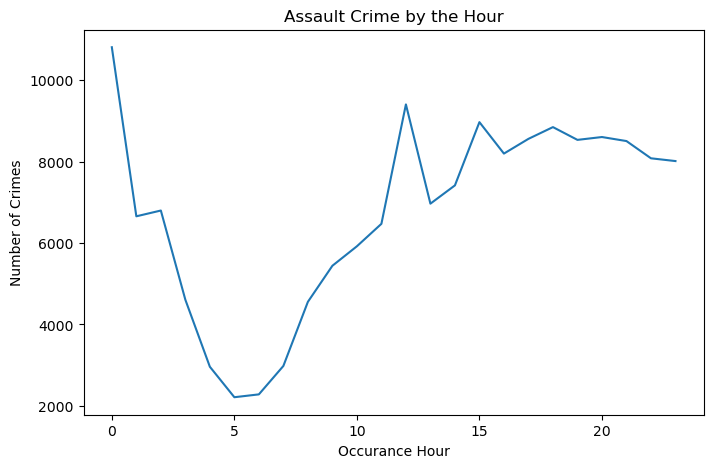

In [7]:
Assault_Crime_by_the_hour.plot(kind="line", figsize=(8, 5))

plt.title('Assault Crime by the Hour')
plt.xlabel("Occurance Hour")
plt.ylabel("Number of Crimes")
plt.show()

In [8]:
Motor_Vehicle_Theft_Crime_by_the_hour = Motor_Vehicle_Theft_Data.groupby(["occurrencehour"])["event_unique_id"].count()
Motor_Vehicle_Theft_Crime_by_the_hour

occurrencehour
0     5925
1     3291
2     2409
3     2157
4     1637
5     1126
6     1220
7     1470
8     1988
9     2404
10    2040
11    1992
12    3663
13    2115
14    2470
15    2757
16    3465
17    4279
18    5495
19    4842
20    4850
21    5101
22    5210
23    5008
Name: event_unique_id, dtype: int64

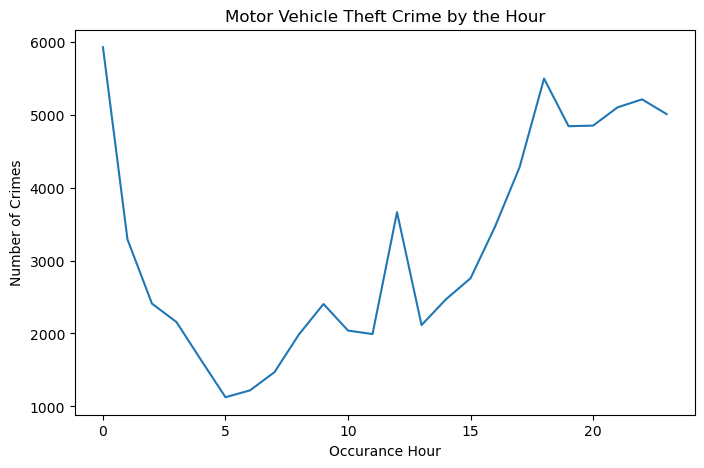

In [9]:
Motor_Vehicle_Theft_Crime_by_the_hour.plot(kind="line", figsize=(8, 5))

plt.title('Motor Vehicle Theft Crime by the Hour')
plt.xlabel("Occurance Hour")
plt.ylabel("Number of Crimes")
plt.show()

In [10]:
Break_and_Enter_Crime_by_the_hour = Break_and_Enter_Data.groupby(["occurrencehour"])["event_unique_id"].count()
Break_and_Enter_Crime_by_the_hour

occurrencehour
0     4211
1     2491
2     2573
3     2882
4     2830
5     2317
6     1617
7     1695
8     2339
9     2413
10    2163
11    2101
12    3188
13    2122
14    2115
15    2035
16    2048
17    2357
18    2537
19    2233
20    2036
21    2003
22    1976
23    2184
Name: event_unique_id, dtype: int64

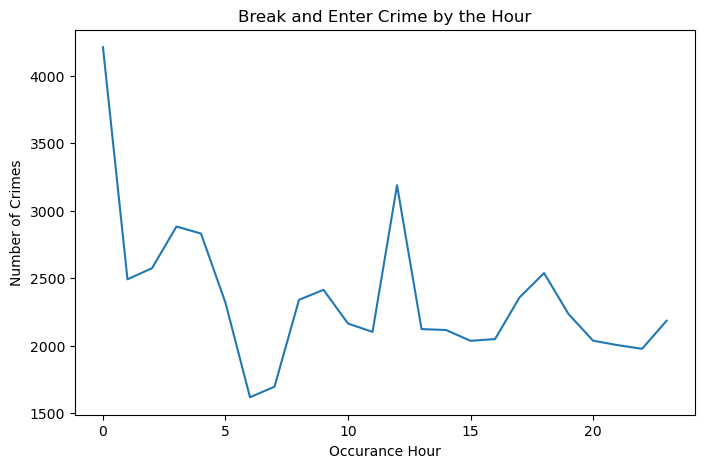

In [11]:
Break_and_Enter_Crime_by_the_hour.plot(kind="line", figsize=(8, 5))

plt.title('Break and Enter Crime by the Hour')
plt.xlabel("Occurance Hour")
plt.ylabel("Number of Crimes")

plt.show()